In [1]:
from __future__ import print_function, division
import sys
import os
import pandas as pd
import matplotlib.pylab as pl
from pandas.tools.plotting import scatter_matrix
import numpy as np

import statsmodels.formula.api as smf
import statsmodels.api as sm

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
PUIdata = os.getenv('PUIDATA')
print(PUIdata)

/home/cusp/vmr286/PUIdata


Source: https://www1.nyc.gov/site/planning/data-maps/open-data/dwn-pluto-mappluto.page            
Download link: https://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/nyc_pluto_16v2%20.zip                                     
This download is a zip file of the PLUTO dataset for all NYC boroughs, but for this homework, I will only use the Manhattan data.

In [3]:
if not os.path.isfile(PUIdata + "/BORO_zip_files_csv/MN.csv"):
    print('Downloading...')
    os.system('curl -O https://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/nyc_pluto_16v2%20.zip')
    os.system('mv nyc_pluto_16v2%20.zip ' + PUIdata)
    os.system('unzip ' + PUIdata + '/nyc_pluto_16v2%20.zip -d ' + PUIdata)
    if os.path.isfile(PUIdata + "/BORO_zip_files_csv/MN.csv"):
        print('File in place, proceed!')
else:
    print('File in place, proceed!')

File in place, proceed!


Data: LL84 Report for 2013                                 
Source: https://data.cityofnewyork.us/Environment/Energy-and-Water-Data-Disclosure-for-Local-Law-84-/rgfe-8y2z                                      
Download link (retrieved from API): https://data.cityofnewyork.us/api/views/rgfe-8y2z/rows.csv?accessType=DOWNLOAD

In [4]:
url = 'https://data.cityofnewyork.us/api/views/rgfe-8y2z/rows.csv?accessType=DOWNLOAD'
filename = 'LL84_2013.csv'

if not os.path.isfile(PUIdata + '/' + filename):
    print('Downloading...')
    os.system('wget ' + url)
    os.system('mv rows.csv?accessType=DOWNLOAD ' + filename)
    os.system('mv ' + filename + ' ' + PUIdata)
    if os.path.isfile(PUIdata + '/' + filename):
        print('File in place, proceed!')
else:
    print('File in place, proceed!')

File in place, proceed!


## Clean Data

In [5]:
df1 = pd.read_csv(PUIdata + '/BORO_zip_files_csv/MN.csv')
df1.head()

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (19,22,23,25,63,79) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Borough,Block,Lot,CD,CT2010,CB2010,SchoolDist,Council,ZipCode,FireComp,...,YCoord,ZoneMap,ZMCode,Sanborn,TaxMap,EDesigNum,APPBBL,APPDate,PLUTOMapID,Version
0,MN,1,10,101,5.0,1018.0,2.0,1.0,10004.0,E007,...,190225.0,16a,Y,199 999,10101.0,NaN,0.0,NaN,1,16V2
1,MN,1,101,101,1.0,1001.0,2.0,1.0,10004.0,E007,...,190636.0,16a,Y,199 999,10101.0,NaN,0.0,NaN,1,16V2
2,MN,1,201,101,1.0,1000.0,2.0,1.0,10004.0,E007,...,193648.0,12b,NaN,199 999,10101.0,NaN,0.0,NaN,1,16V2
3,MN,1,301,101,NaN,NaN,2.0,1.0,10004.0,E007,...,NaN,12b,NaN,199 999,10101.0,NaN,0.0,NaN,4,16V2
4,MN,1,401,101,NaN,NaN,2.0,1.0,10004.0,E007,...,NaN,12b,NaN,1 99 999,10101.0,NaN,0.0,NaN,4,16V2


In [6]:
df1.columns

Index([u'Borough', u'Block', u'Lot', u'CD', u'CT2010', u'CB2010',
       u'SchoolDist', u'Council', u'ZipCode', u'FireComp', u'PolicePrct',
       u'HealthArea', u'SanitBoro', u'SanitDistrict', u'SanitSub', u'Address',
       u'ZoneDist1', u'ZoneDist2', u'ZoneDist3', u'ZoneDist4', u'Overlay1',
       u'Overlay2', u'SPDist1', u'SPDist2', u'SPDist3', u'LtdHeight',
       u'SplitZone', u'BldgClass', u'LandUse', u'Easements', u'OwnerType',
       u'OwnerName', u'LotArea', u'BldgArea', u'ComArea', u'ResArea',
       u'OfficeArea', u'RetailArea', u'GarageArea', u'StrgeArea',
       u'FactryArea', u'OtherArea', u'AreaSource', u'NumBldgs', u'NumFloors',
       u'UnitsRes', u'UnitsTotal', u'LotFront', u'LotDepth', u'BldgFront',
       u'BldgDepth', u'Ext', u'ProxCode', u'IrrLotCode', u'LotType',
       u'BsmtCode', u'AssessLand', u'AssessTot', u'ExemptLand', u'ExemptTot',
       u'YearBuilt', u'YearAlter1', u'YearAlter2', u'HistDist', u'Landmark',
       u'BuiltFAR', u'ResidFAR', u'CommFAR', u'

In [7]:
df1.drop(['Borough', 'Block', 'Lot', 'CD', 'CT2010', 'CB2010',
       'SchoolDist', 'Council', 'ZipCode', 'FireComp', 'PolicePrct',
       'HealthArea', 'SanitBoro', 'SanitDistrict', 'SanitSub', 'Address',
       'ZoneDist1', 'ZoneDist2', 'ZoneDist3', 'ZoneDist4', 'Overlay1',
       'Overlay2', 'SPDist1', 'SPDist2', 'SPDist3', 'LtdHeight',
       'SplitZone', 'BldgClass', 'LandUse', 'Easements', 'OwnerType',
       'OwnerName', 'LotArea', 'BldgArea', 'ComArea', 'ResArea',
       'OfficeArea', 'RetailArea', 'GarageArea', 'StrgeArea',
       'FactryArea','OtherArea', 'AreaSource', 'NumBldgs', 'NumFloors',
       'LotFront', 'LotDepth', 'BldgFront',
       'BldgDepth', 'Ext', 'ProxCode', 'IrrLotCode', 'LotType',
       'BsmtCode', 'AssessLand', 'AssessTot','ExemptLand', 'ExemptTot',
       'YearAlter1', 'YearAlter2','HistDist', 'Landmark','XCoord', 'YCoord', 'ZoneMap','ZMCode','CondoNo',
       'BuiltFAR', 'ResidFAR', 'CommFAR', 'FacilFAR', 'BoroCode','Sanborn', 'TaxMap', 'EDesigNum', 'APPBBL', 'APPDate',
       'PLUTOMapID', 'Version'], axis = 1, inplace = True)
df1.head()

,UnitsRes,UnitsTotal,YearBuilt,BBL,Tract2010
0,0,0,1900,1.000010e+09,5
1,0,0,1900,1.000010e+09,1
2,0,0,1900,1.000010e+09,1
3,0,0,0,1.000010e+09,0
4,0,0,0,1.000010e+09,0


In [8]:
df2 = pd.read_csv(PUIdata + '/LL84_2013.csv')
df2.head()

,Record Number,BBL,Co-reported BBL Status,BBLs Co-reported,Reported NYC Building Identificaiton Numbers (BINs),Street Number,Street Name,Borough,Postcode,DOF Benchmarking Submission Status,...,DOF Property Floor Area (Buildngs and Parking)(ft2),Primary Property Type - Self Selected,DOF Number of Buildings,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,NTA
0,12086,1.000410e+09,NaN,1000410001,1001007,NaN,NaN,Manhattan,NaN,BBL not valid,...,NaN,Office,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,14354,4.021460e+09,NaN,NaN,NaN,63-10,108 STREET,Queens,11375.0,No Submission Matched to BBL,...,82730.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,12150,2.027620e+09,NaN,2027620097,2006460,NaN,NaN,Bronx,NaN,BBL not valid,...,NaN,Multifamily Housing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,12590,1.006700e+09,NaN,NaN,NaN,201,11 AVENUE,Manhattan,10001.0,No Submission Matched to BBL,...,440360.0,NaN,1.0,40.749652,-74.006471,4.0,3.0,99.0,1012266.0,Hudson Yards-Chelsea-Flatiron-Union Square ...
4,15591,2.048300e+09,NaN,2048300034,2063117,NaN,NaN,Bronx,NaN,Not on Covered Buildings List,...,NaN,Multifamily Housing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df2.columns

Index([u'Record Number', u'BBL', u'Co-reported BBL Status',
       u'BBLs Co-reported',
       u'Reported NYC Building Identificaiton Numbers (BINs)',
       u'Street Number', u'Street Name', u'Borough', u'Postcode',
       u'DOF Benchmarking Submission Status', u'Site EUI(kBtu/ft2)',
       u'Weather Normalized Site EUI(kBtu/ft2)', u'Source EUI(kBtu/ft2)',
       u'Weather Normalized Source EUI(kBtu/ft2)',
       u'Municipally Supplied Potable Water - Indoor Intensity (gal/ft²)',
       u'Automatic Water Benchmarking Eligible', u'Reported Water Method',
       u'ENERGY STAR Score', u'Total GHG Emissions(MtCO2e)',
       u'Direct GHG Emissions(MtCO2e)', u'Indirect GHG Emissions(MtCO2e)',
       u'Reported Property Floor Area (Building(s)) (ft²)',
       u'DOF Property Floor Area (Buildngs and Parking)(ft2)',
       u'Primary Property Type - Self Selected', u'DOF Number of Buildings',
       u'Latitude', u'Longitude', u'Community Board', u'Council District',
       u'Census Tract', u'BI

In [10]:
df2.drop(['Record Number', 'Co-reported BBL Status',
       'BBLs Co-reported',
       'Reported NYC Building Identificaiton Numbers (BINs)',
       'Street Number', 'Street Name', 'Borough', 
       'DOF Benchmarking Submission Status',
       'Weather Normalized Site EUI(kBtu/ft2)', 'Source EUI(kBtu/ft2)',
       'Weather Normalized Source EUI(kBtu/ft2)',
       'Municipally Supplied Potable Water - Indoor Intensity (gal/ft²)',
       'Automatic Water Benchmarking Eligible', 'Reported Water Method',
       'ENERGY STAR Score', 'Total GHG Emissions(MtCO2e)',
       'Direct GHG Emissions(MtCO2e)', 'Indirect GHG Emissions(MtCO2e)',
'Primary Property Type - Self Selected', 
       'Latitude', 'Longitude', 'Community Board', 'Council District',
       'Census Tract', 'BIN', 'NTA'], axis = 1, inplace = True)
df2.head()

,BBL,Postcode,Site EUI(kBtu/ft2),Reported Property Floor Area (Building(s)) (ft²),DOF Property Floor Area (Buildngs and Parking)(ft2),DOF Number of Buildings
0,1.000410e+09,NaN,NaN,918919,NaN,NaN
1,4.021460e+09,11375.0,NaN,NaN,82730.0,1.0
2,2.027620e+09,NaN,NaN,64200,NaN,NaN
3,1.006700e+09,10001.0,NaN,NaN,440360.0,1.0
4,2.048300e+09,NaN,NaN,50000,NaN,NaN


In [11]:
df2 = df2.rename(columns = {'Site EUI(kBtu/ft2)' : 'siteEUI', 'DOF Property Floor Area (Buildngs and Parking)(ft2)' : 'DOFproperty','DOF Number of Buildings':'DOFBuildings', 
                           'Reported Property Floor Area (Building(s)) (ft²)':'Reported'})
df2.head()

,BBL,Postcode,siteEUI,Reported,DOFproperty,DOFBuildings
0,1.000410e+09,NaN,NaN,918919,NaN,NaN
1,4.021460e+09,11375.0,NaN,NaN,82730.0,1.0
2,2.027620e+09,NaN,NaN,64200,NaN,NaN
3,1.006700e+09,10001.0,NaN,NaN,440360.0,1.0
4,2.048300e+09,NaN,NaN,50000,NaN,NaN


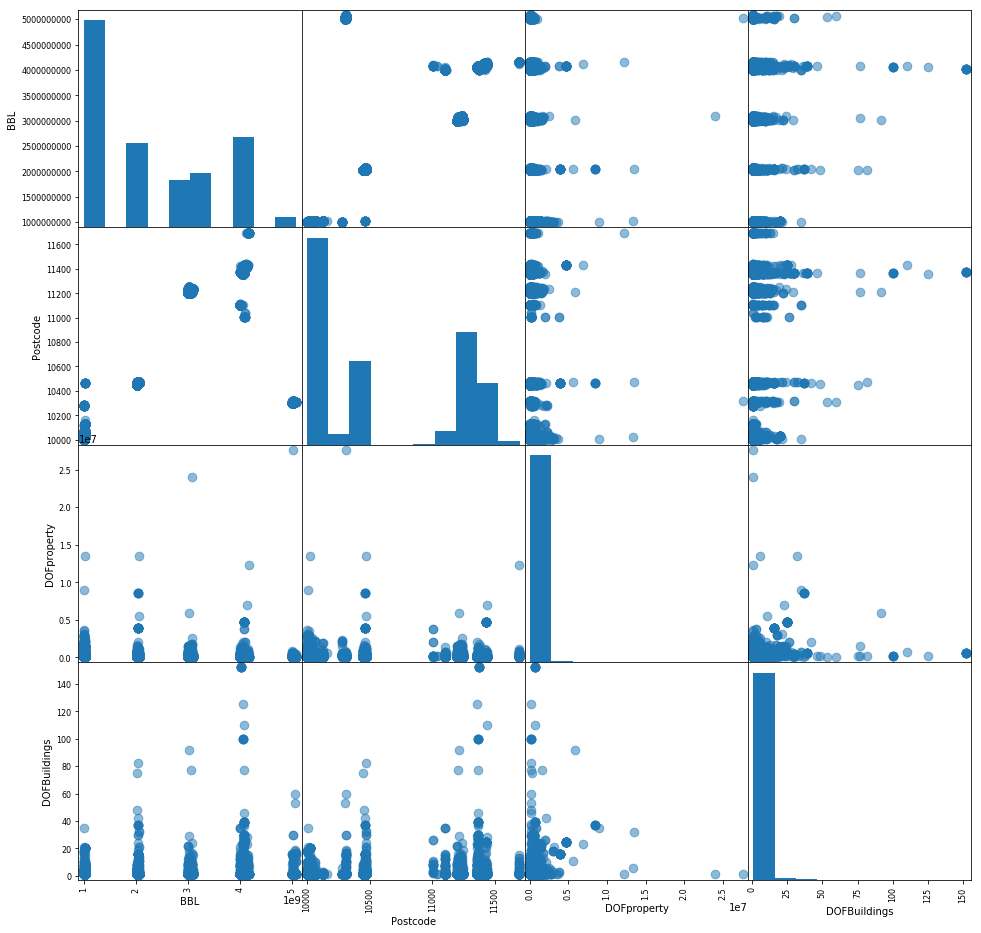

In [12]:
scatter_matrix(df2, s = 300, figsize=(16,16));

## Fig 1. scatter matrix of all numerical values in the files LL84_2013.csv
We cannot conclude anything from this figure. This kind of plot shows correlations between variables, but it will also show me what can and cannot be plotted trivially in my dataset. Here only a few columns can be plotted: those that contain only numbers (and possibly NaN's), but most columns contain rows that cannot be converted to float (e.g. entries like 'See Primary BBL' in several rows for the energy dataframe 'Site EUI(kBtu/ft2) ' column) , so Pandas refuses to plot them, cause it does not know what to do with those entries. Therefore we need to convert something first.

In [13]:
#pd.to_numeric?
df2.siteEUI = pd.to_numeric(df2.siteEUI, errors = 'coerce')
count = np.isnan(df2.siteEUI).sum()
print ("invalid entries changed to NaN %d"%sum(count))

invalid entries changed to NaN 4623


In [14]:
df2.Reported = pd.to_numeric(df2.Reported,errors = 'coerce')
count = np.isnan(df2.Reported).sum()
print("invalid entries changed to NaN %d"%sum(count))

invalid entries changed to NaN 3125


## Merge Data

In [15]:
data = df1.merge(df2, on = 'BBL')
data.head()

,UnitsRes,UnitsTotal,YearBuilt,BBL,Tract2010,Postcode,siteEUI,Reported,DOFproperty,DOFBuildings
0,0,0,1900,1.000010e+09,5,10004.0,NaN,NaN,2725731.0,1.0
1,0,52,1969,1.000048e+09,9,10004.0,92.5,2428325.0,2621563.0,1.0
2,0,1,1969,1.000050e+09,9,10004.0,NaN,NaN,1016406.0,1.0
3,0,7,1970,1.000058e+09,9,10004.0,134.5,1338000.0,1354691.0,1.0
4,42,43,1920,1.000078e+09,9,NaN,57.8,55689.0,NaN,NaN


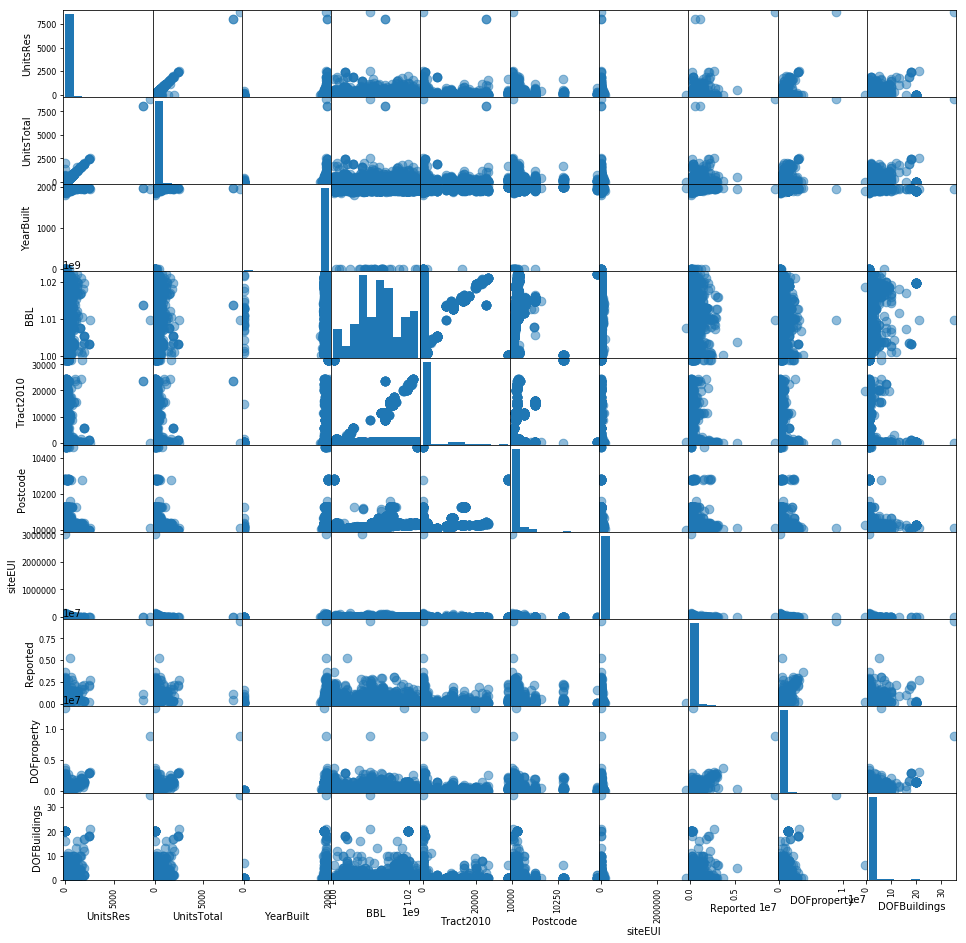

In [16]:
scatter_matrix(data, s = 300, figsize =(16,16));

## Fig 2. scatter matrix of all numerical values in the merged dataset
There is linear relationship between the number of residential units (UnitsRes) and the total number of units (UnitsTotal) in a BBL

## Energy VS Units

In [17]:
data['Energy'] = data.siteEUI * data.Reported
data.head()

,UnitsRes,UnitsTotal,YearBuilt,BBL,Tract2010,Postcode,siteEUI,Reported,DOFproperty,DOFBuildings,Energy
0,0,0,1900,1.000010e+09,5,10004.0,NaN,NaN,2725731.0,1.0,NaN
1,0,52,1969,1.000048e+09,9,10004.0,92.5,2428325.0,2621563.0,1.0,224620062.5
2,0,1,1969,1.000050e+09,9,10004.0,NaN,NaN,1016406.0,1.0,NaN
3,0,7,1970,1.000058e+09,9,10004.0,134.5,1338000.0,1354691.0,1.0,179961000.0
4,42,43,1920,1.000078e+09,9,NaN,57.8,55689.0,NaN,NaN,3218824.2


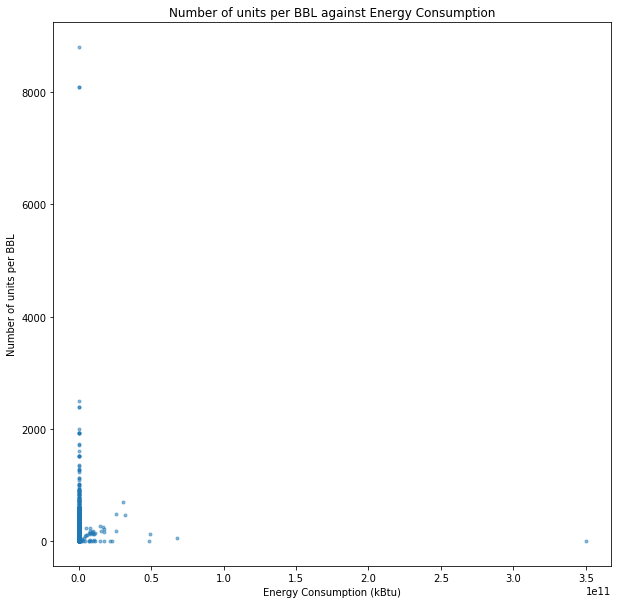

In [18]:
fig = pl.figure(figsize(10,10))
pl.plot(data.Energy, data.UnitsTotal,'.', alpha = 0.5)
pl.title('Number of units per BBL against Energy Consumption')
pl.xlabel('Energy Consumption (kBtu)')
pl.ylabel('Number of units per BBL')

## Fig 3. Total number of units VS Total Energy Consumption( kBtu)
Because all the datapoints are at very low Unit numbers while the Unit number range actually goes up to 8000, we need to make a zoom-in plot
that zooms into the region where most points are by cutting x and y axis plotted

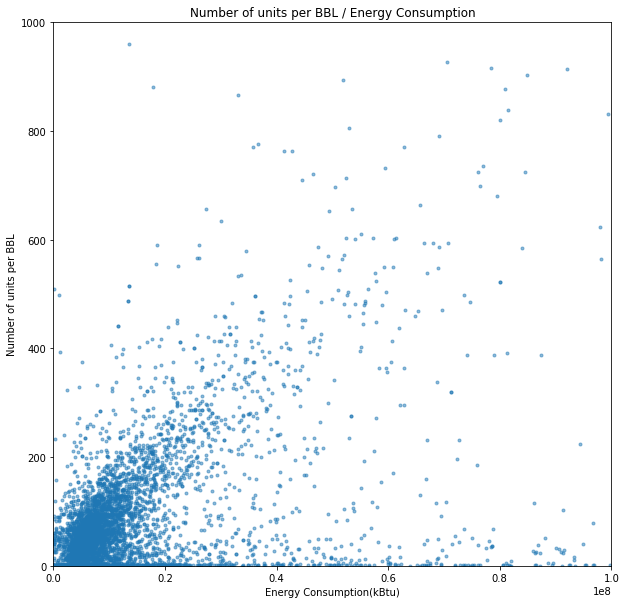

In [19]:
fig = pl.figure(figsize(10,10))
pl.plot(data.Energy, data.UnitsTotal,'.', alpha = 0.5)
pl.title('Number of units per BBL / Energy Consumption')
pl.xlim(1000,1e8)
pl.ylim(0,1000)
pl.xlabel('Energy Consumption(kBtu)')
pl.ylabel('Number of units per BBL')

## Fig 4. Zoomed in Version of Fig 3.
We can see from this figure that most points are concentrated on the lower left corner, as well as there are some outliers that we need to consider removing

In [20]:
data.dropna(inplace = True)
data.head()

,UnitsRes,UnitsTotal,YearBuilt,BBL,Tract2010,Postcode,siteEUI,Reported,DOFproperty,DOFBuildings,Energy
1,0,52,1969,1.000048e+09,9,10004.0,92.5,2428325.0,2621563.0,1.0,224620062.5
3,0,7,1970,1.000058e+09,9,10004.0,134.5,1338000.0,1354691.0,1.0,179961000.0
5,97,98,1985,1.000088e+09,9,10004.0,118.9,169055.0,169061.0,1.0,20100639.5
6,0,9,1970,1.000090e+09,9,10004.0,78.5,852840.0,845018.0,1.0,66947940.0
7,0,0,1987,1.000090e+09,9,10004.0,68.6,574095.0,544015.0,1.0,39382917.0


### Removing Outliers

In [21]:
data_sh = data[(data.UnitsTotal >= 10) & (data.UnitsTotal < 1000) & (data.Energy > 1000)]

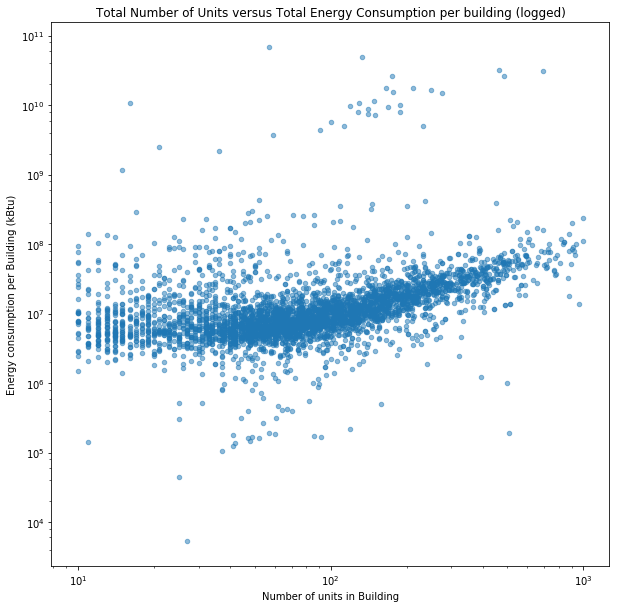

In [22]:
ax = data_sh.plot(x = 'UnitsTotal', y = 'Energy', kind = 'Scatter', loglog = True, alpha = 0.5, figsize = (10,10))
ax.set_xlabel("Number of units in Building")
ax.set_ylabel("Energy consumption per Building (kBtu)")
ax.set_title("Total Number of Units versus Total Energy Consumption per building (logged)")

## Fig 5. log(Total Energy Consumption(kBtu)) Versus log(Total Units in Buildings)
This figure shows that there is either a linear or curved relationship with log transformation. We should be able to draw a line in the figre

## Units VS Energy

In [23]:
x= data_sh.Energy
y = data_sh.UnitsTotal

In [24]:
X = sm.add_constant(np.log10(x))
Y = np.log10(y)

In [25]:
lm1 = sm.OLS(Y,X).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             UnitsTotal   R-squared:                       0.166
Model:                            OLS   Adj. R-squared:                  0.166
Method:                 Least Squares   F-statistic:                     799.8
Date:                Mon, 04 Dec 2017   Prob (F-statistic):          1.38e-160
Time:                        13:22:19   Log-Likelihood:                -1604.1
No. Observations:                4008   AIC:                             3212.
Df Residuals:                    4006   BIC:                             3225.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -0.4815      0.084     -5.720      0.000        -0.647    -0.316
Energy         0.3374      0.012     28.281      0.000         0.314     0.361
==============================================================================
Omnibus:                      149.144   Durbin-Watson:                   1.295
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              165.686
Skew:                          -0.481   Prob(JB):                     1.05e-36
Kurtosis:                       3.260   Cond. No.                         106.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

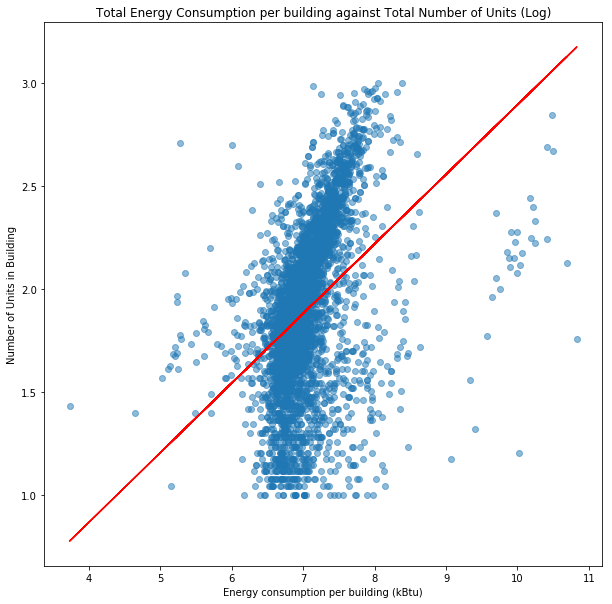

In [26]:
fig = pl.figure(figsize = (10,10))
pl.plot(np.log10(data_sh.Energy), np.log10(data_sh.UnitsTotal), 'o', alpha = 0.5)
pl.plot(np.log10(data_sh.Energy), lm1.predict(sm.add_constant(np.log10(data_sh.Energy))), 'r-')
pl.xlabel("Energy consumption per building (kBtu)")
pl.ylabel("Number of Units in Building")
pl.title("Total Energy Consumption per building against Total Number of Units (Log)")

## Fig 6. Number of Units VS Energy Consumption (kBtu)
From the figure we can see that the line doesn't fit

### Energy VS Units

In [27]:
x2 = data_sh.UnitsTotal
y2 = data_sh.Energy

X2 = sm.add_constant(np.log10(x2))
Y2 = np.log10(y2)

In [28]:
lm2 = sm.OLS(Y2,X2).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Energy   R-squared:                       0.166
Model:                            OLS   Adj. R-squared:                  0.166
Method:                 Least Squares   F-statistic:                     799.8
Date:                Mon, 04 Dec 2017   Prob (F-statistic):          1.38e-160
Time:                        13:22:20   Log-Likelihood:                -2365.2
No. Observations:                4008   AIC:                             4734.
Df Residuals:                    4006   BIC:                             4747.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          6.1050      0.034    180.957      0.000         6.039     6.171
UnitsTotal     0.4933      0.017     28.281      0.000         0.459     0.527
==============================================================================
Omnibus:                     2200.210   Durbin-Watson:                   1.647
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            46847.024
Skew:                           2.162   Prob(JB):                         0.00
Kurtosis:                      19.181   Cond. No.                         11.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

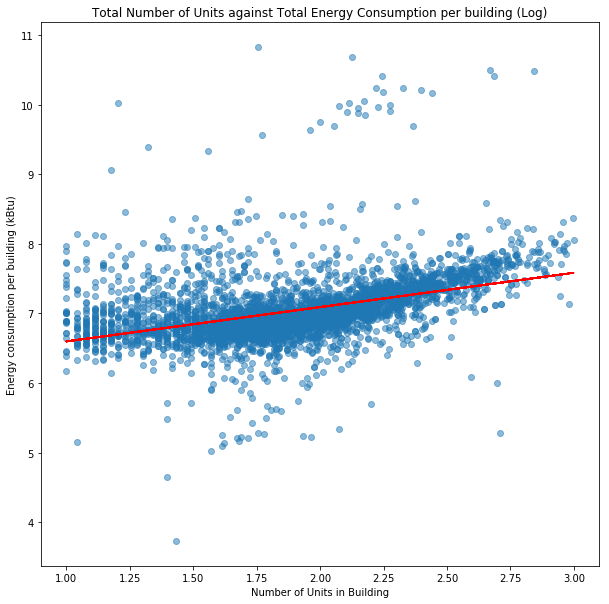

In [29]:
fig = pl.figure(figsize = (10,10))
pl.plot(np.log10(data_sh.UnitsTotal), np.log10(data_sh.Energy), 'o', alpha = 0.5)
pl.plot(np.log10(data_sh.UnitsTotal), lm2.predict(sm.add_constant(np.log10(data_sh.UnitsTotal))), 'r-')
pl.xlabel("Number of Units in Building")
pl.ylabel("Energy consumption per building (kBtu)")
pl.title("Total Number of Units against Total Energy Consumption per building (Log)")

## Fig 7. Energy Consumption VS Number of Units
This figure indicate the fitness is good

### Evaluate which is better by calculating the chi square

In [30]:
def chi2(data, model, errors = None):
    '''Calculates the chi sq given data, model and errors
    Arguments:
    data: series of datapoints (endogenous variable)
    model: series of predicted values corresponding to the observed data
    errors: serie of errors (optional). 
    If errors are not passes all errors are set to 1
    '''
    if errors is None:
        errors = np.ones_like(data)
    if data.shape == model.shape and data.shape == errors.shape:
        return (((data - model)**2) / errors**2).sum()
    else: 
        print ('''ERROR:
must pass arrays of identical dimension for data, model and (optional) error)''')
    return -1

In [31]:
## Assume that there is error in the reported energy. 
## but that is the product of two measured qusntities, each of which will have errors. 
## The minimum error is the squareroot of the value

#Below I am writing out some uncertainties - please explain the functional form that I used.
#errors on the measured quantities
data = np.log10(data_sh.UnitsTotal)
model = lm1.predict(sm.add_constant(np.log10(data_sh.Energy)))
error = np.sqrt(data)
errorLog = np.abs(error / data_sh.UnitsTotal / np.log(10))

print("{:.4f}".format(chi2(data, model, errorLog)))

72458390.0973


In [32]:
data2 = np.log10(data_sh.Energy) # endogenous / DV
model2 = lm2.predict(sm.add_constant(np.log10(data_sh.UnitsTotal)))
error2 = np.sqrt((data_sh.Reported**2) + (data_sh.siteEUI**2))
errorLog2 = np.abs(error2 / data_sh.Energy / np.log(10))

print("{:.4f}".format(chi2(data2, model2, errorLog2)))

3506018253907.0684


In [33]:
df2 = pd.DataFrame({'x': np.log10(data_sh.UnitsTotal), 'y': np.log10(data_sh.Energy)})
df2['x2'] = df2.x**2
df2.head()

,x,y,x2
1,1.716003,8.351449,2.944667
5,1.991226,7.303210,3.964981
9,1.176091,7.633503,1.383191
11,1.301030,7.551926,1.692679
14,1.322219,6.724351,1.748264


In [34]:
x_fit = np.arange(np.log10(data_sh.UnitsTotal).min(), np.log10(data_sh.UnitsTotal).max(), 0.01)
poly_fit = pd.DataFrame({'x': x_fit, 'x2': x_fit**2})

In [35]:
pm = smf.ols(formula='y ~ x2 + x', data=df2).fit()
pm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.230
Model:                            OLS   Adj. R-squared:                  0.230
Method:                 Least Squares   F-statistic:                     598.9
Date:                Mon, 04 Dec 2017   Prob (F-statistic):          2.87e-228
Time:                        13:22:21   Log-Likelihood:                -2205.7
No. Observations:                4008   AIC:                             4417.
Df Residuals:                    4005   BIC:                             4436.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      8.1247      0.116     70.335      0.000         7.898     8.351
x2             0.5799      0.032     18.217      0.000         0.518     0.642
x             -1.7194      0.123    -14.023      0.000        -1.960    -1.479
==============================================================================
Omnibus:                     2374.005   Durbin-Watson:                   1.709
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            63876.741
Skew:                           2.328   Prob(JB):                         0.00
Kurtosis:                      21.995   Cond. No.                         118.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

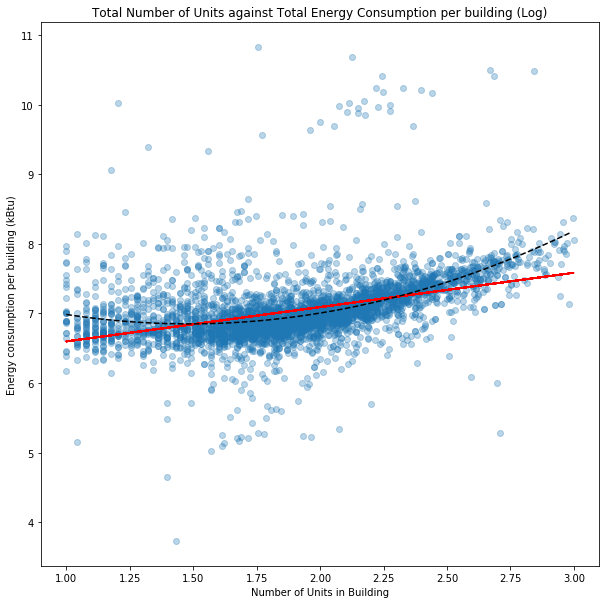

In [36]:
fig3 = pl.figure(figsize=(10, 10))
pl.plot(np.log10(data_sh.UnitsTotal), np.log10(data_sh.Energy), 'o',alpha=0.3)
pl.plot(np.log10(data_sh.UnitsTotal), lm2.predict(sm.add_constant(np.log10(data_sh.UnitsTotal))), 'r-')
pl.plot(x_fit, pm.predict(sm.add_constant(poly_fit)), 'k--')
pl.xlabel("Number of Units in Building")
pl.ylabel("Energy consumption per building (kBtu)")
pl.title("Total Number of Units against Total Energy Consumption per building (Log)");

## Fig 8. Linear Fitness VS Poly Fitness
By comparing the linear line and poly line, we can tell that poly regression has a better fit

In [37]:
linemodel = lm2
curvemodel = pm

In [38]:
print ("LR : ", -2 * (-linemodel.llf - (-curvemodel.llf)))
print ("LR from statsmodels:", curvemodel.compare_lr_test(linemodel)[0])

LR :  -319.063300643
LR from statsmodels: 319.063300643


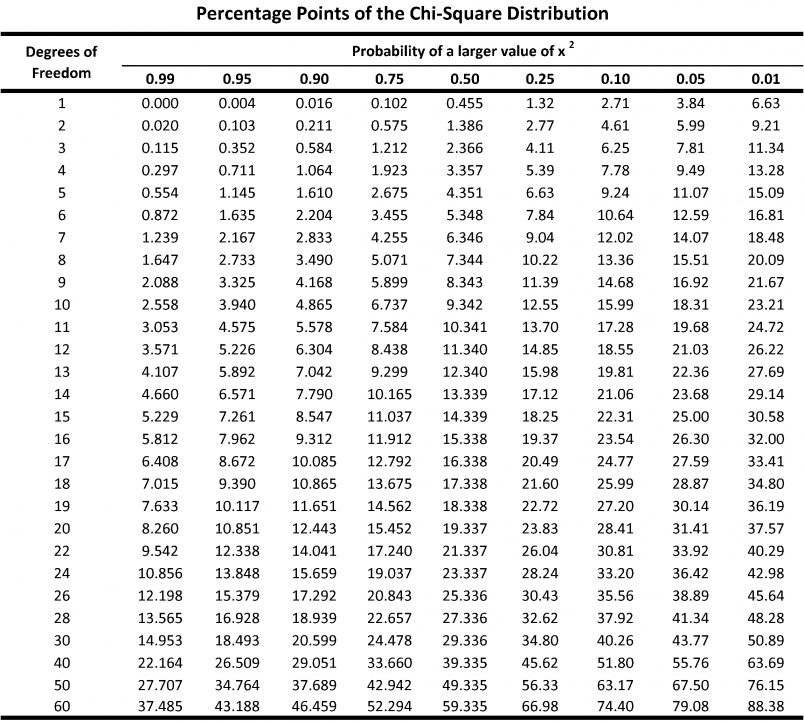

In [39]:
from IPython.display import Image
Image('http://passel.unl.edu/Image/Namuth-CovertDeana956176274/chi-sqaure%20distribution%20table.PNG')

Based on the Chi-test, the LR statistics = 325.16 is way too big for X at 0.05, therefore We reject the null hypothesis, the linear regression model is not preferable to the curve. 

GRade: 9/10 - explanation for error formulae missing.